In [29]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re



In [4]:
import torch
print("Built with CUDA:", torch.version.cuda)          # должно быть '11.8'
print("cuDNN version:", torch.backends.cudnn.version())  # число, не None
print("CUDA available:", torch.cuda.is_available())

Built with CUDA: 12.1
cuDNN version: 90100
CUDA available: True


In [5]:
path = 'jigsaw-toxic-comment-classification-challenge/train.csv'

In [6]:
# Reading dataset using pandas
data = pd.read_csv(path)
labels = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
# Creating new column named as "non_toxic" : if comment doesn't belong in any of the class then "non_toxic" will be 1 else 0

data["non_toxic"] = data.iloc[:,2:8].apply(lambda x: 1 if (sum(x)==0) else 0, axis=1)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [8]:
Total_of_Class = {}                   # Total labeled comments from each class
for col in data.iloc[:,2:].columns:
    Total_of_Class[col] = data[col].value_counts()[1]
    print(f"{col} : {Total_of_Class[col]}\n")

toxic : 15294

severe_toxic : 1595

obscene : 8449

threat : 478

insult : 7877

identity_hate : 1405

non_toxic : 143346



In [9]:
# creating new column named "total_classes" which will show total no. of classes comment belongs to

data["total_classes"] = data.iloc[:,2:8].apply(lambda x: sum(x), axis=1)    # if we take sum of all labels we can tell how many classes comment belong to
data                                                                        # for ex. if comment belongs to "toxic" and "threat" then the sum will be 2

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,total_classes
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1,0


In [10]:
print("Total no of \"Other Classes\" comments belong to when class is\n")
for col in data.iloc[:,2:8].columns:
    print(f"\"{col}\"")
    print(np.sort(data[data[col]==1]["total_classes"].unique()-1),"\n")
print("0 means it only belongs to one class only, 1 means it belongs to 1 other class ie 2 classes in total, etc.")

Total no of "Other Classes" comments belong to when class is

"toxic"
[0 1 2 3 4 5] 

"severe_toxic"
[1 2 3 4 5] 

"obscene"
[0 1 2 3 4 5] 

"threat"
[0 1 2 3 4 5] 

"insult"
[0 1 2 3 4 5] 

"identity_hate"
[0 1 2 3 4 5] 

0 means it only belongs to one class only, 1 means it belongs to 1 other class ie 2 classes in total, etc.


**From above we can say that this is "Multilabel Classification Problem" and target is on nominal scale**

In [11]:
multi_label_total = {}
for value in data["total_classes"].unique():
    multi_label_total[value] = data["total_classes"].value_counts()[value]
multi_label_total

{0: 143346, 4: 1760, 1: 6360, 3: 4209, 2: 3480, 5: 385, 6: 31}

In [12]:
list(multi_label_total.values()).pop(0)

143346

In [13]:
# creating lists of data for visualization
klst= list(multi_label_total.keys())
vlst = list(multi_label_total.values())
# print(klst,"\n",vlst)

vlst_0 = vlst.copy()
klst_0 = klst.copy()
vlst_0.pop(0)
klst_0.pop(0)

0

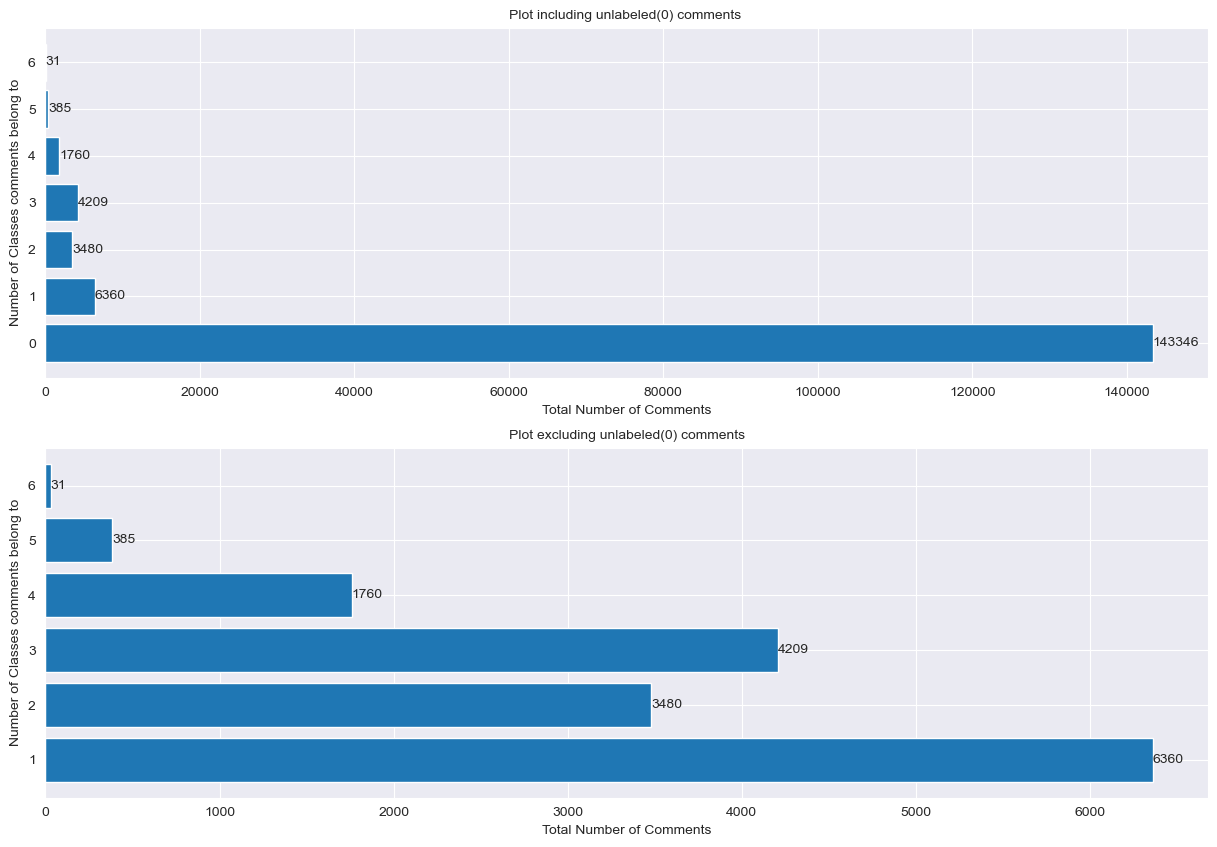

In [14]:
plt.figure(figsize=(15,10))

fr = plt.subplot(2,1,1)
plt.barh(width=vlst,y=klst)
fr.set_xlabel("Total Number of Comments", fontsize=10)
fr.set_ylabel("Number of Classes comments belong to", fontsize=10)
fr.set_title("Plot including unlabeled(0) comments ", fontsize=10)
for key in klst:
    fr.annotate(text=multi_label_total[key], xy=(multi_label_total[key],key), xycoords="data",size=10, va="center")

se = plt.subplot(2,1,2)
plt.barh(width=vlst_0,y=klst_0)
se.set_xlabel("Total Number of Comments", fontsize=10)
se.set_ylabel("Number of Classes comments belong to", fontsize=10)
se.set_title("Plot excluding unlabeled(0) comments", fontsize=10)
for key in klst_0:
    se.annotate(text=multi_label_total[key], xy=(multi_label_total[key],key), xycoords="data",size=10, va="center")

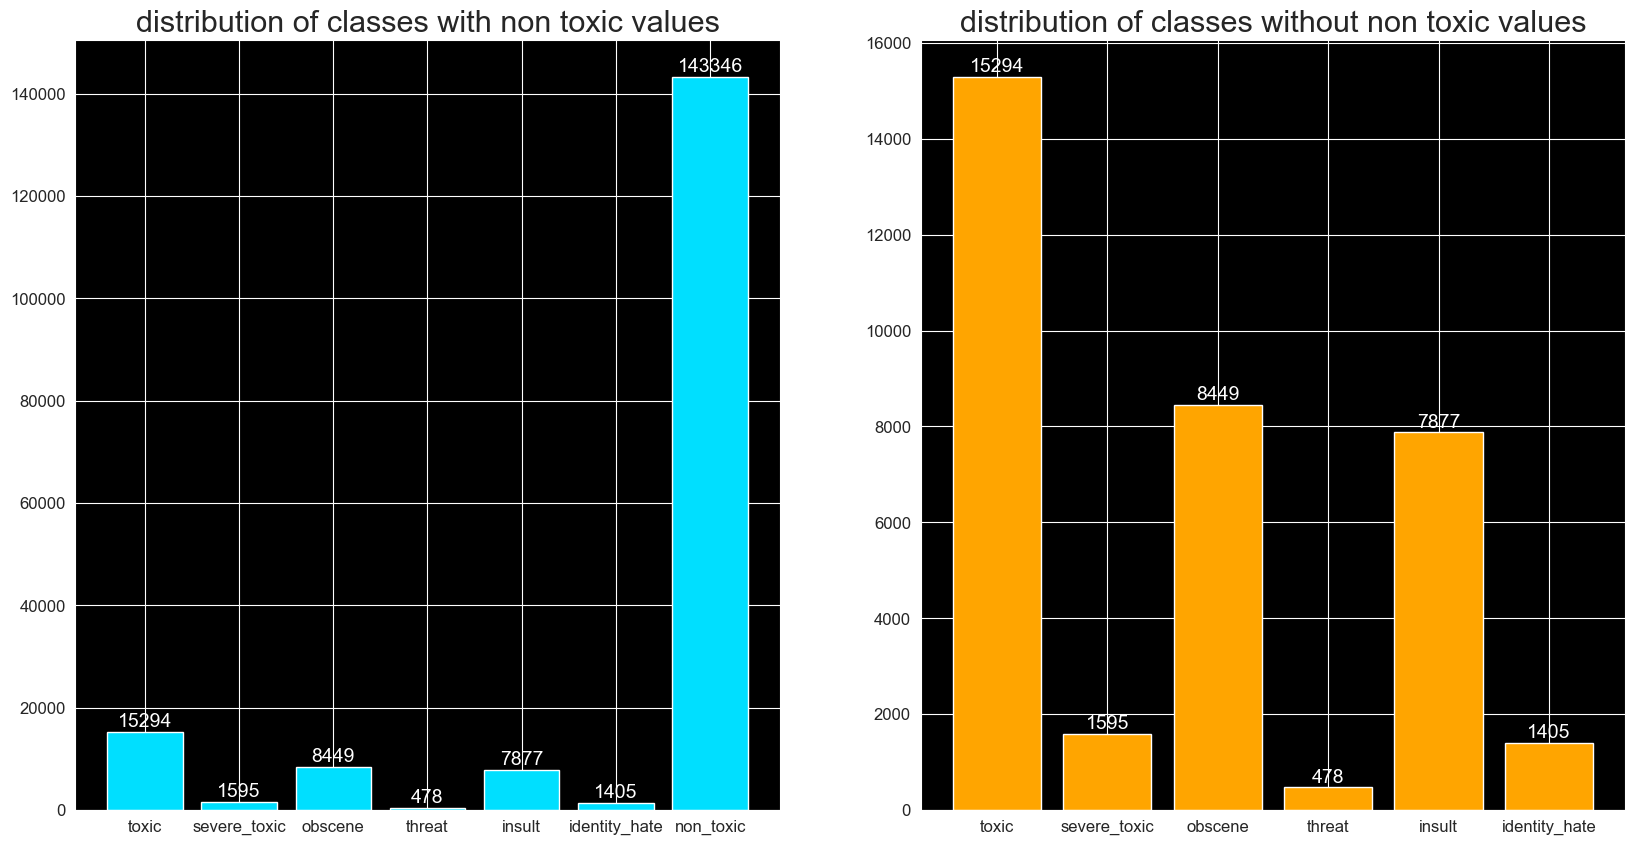

In [15]:
# plotting distribution of classes 

font1 = {"size":12}
all_tox = list(Total_of_Class.values())
plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 12})
plt.rc("font",**font1)

left = plt.subplot(1,2,1)
plt.bar(x = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic'], height = Total_of_Class.values(), color="#00DFFF")
left.set_facecolor("black")
left.set_title("distribution of classes with non toxic values", fontsize=22)
for key in ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic']:
    left.annotate(text=Total_of_Class[key], xy=(key,Total_of_Class[key]+1000), xycoords="data", color="white", size=14, ha="center")

right = plt.subplot(1,2,2)
plt.bar(x = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate'], height = all_tox[:-1], color="orange")
right.set_facecolor("black")
right.set_title("distribution of classes without non toxic values",fontsize=22)
for key in ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']:
    right.annotate(text=Total_of_Class[key], xy=(key,Total_of_Class[key]+100), xycoords="data", color="white", size=14, ha="center")

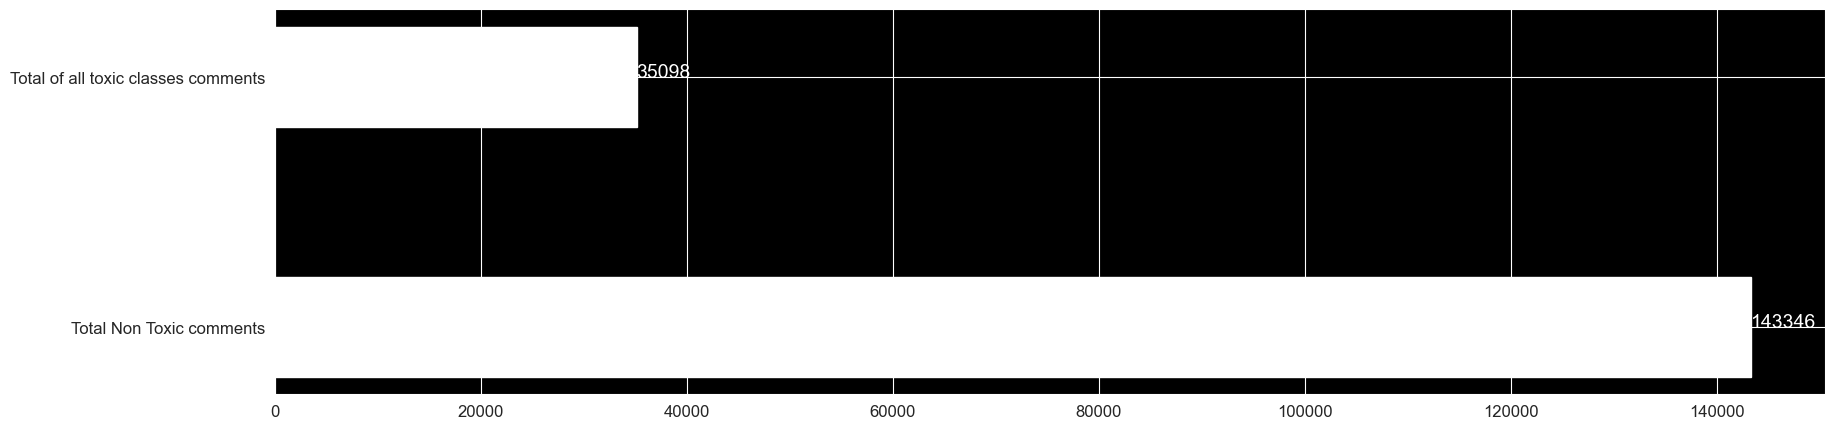

In [16]:
# plot of total of all toxic classes and non toxic

temp = {"Total Non Toxic comments":int(all_tox[-1]), "Total of all toxic classes comments":int(sum(all_tox[:-1]))}
# font = {"size":25}
plt.figure(figsize=(20,5))
# plt.axes().set_facecolor("black")

subp = plt.subplot(1,1,1)
subp.set_facecolor("black")
# plt.rcParams.update({'font.size': 30})
# plt.rc("font",**font)
plt.barh(width=[all_tox[-1],sum(all_tox[:-1])], y=["Total Non Toxic comments", "Total of all toxic classes comments"], height=0.4, color="white")
for key in temp.keys():
    subp.annotate(text=temp[key], xy=(temp[key],key), xycoords="data", color="white", size=14)

In [17]:
# copying our dataset in new variable for further text preprocessing
new_data = data.copy()

In [18]:
# creating copy of data for data cleaning and preprocessing
cleaned_data = new_data.copy()

# Removing Hyperlinks from text
# The below code is a re pattern that matches URLs beginning with http or https, followed by :// and one or more 
# non-whitespace characters, or URLs beginning with www., followed by one or more non-whitespace characters. 

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"https?://\S+|www\.\S+","",x) )

print(data.loc[629,"comment_text"],"\n\n")
print("++++ After Removing URLs ++++\n\n ")
print(cleaned_data.loc[629,"comment_text"])

Edit request on 29 October 2013 

The Arctic Monkeys played Walk on the Wild Side in honour of Lou Reed at Echo Arena, Liverpool, a day after the musician's death.
http://www.rollingstone.com/music/videos/arctic-monkeys-cover-lou-reeds-walk-on-the-wild-side-20131029 


++++ After Removing URLs ++++

 
Edit request on 29 October 2013 

The Arctic Monkeys played Walk on the Wild Side in honour of Lou Reed at Echo Arena, Liverpool, a day after the musician's death.



In [19]:
# Removing emojis from text
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub("["
                                                                                   u"\U0001F600-\U0001F64F"
                                                                                   u"\U0001F300-\U0001F5FF"  
                                                                                   u"\U0001F680-\U0001F6FF" 
                                                                                   u"\U0001F1E0-\U0001F1FF"  
                                                                                   u"\U00002702-\U000027B0"
                                                                                   u"\U000024C2-\U0001F251"
                                                                                   "]+","", x, flags=re.UNICODE))

print(data.loc[728,"comment_text"],"\n\n")
print("++++ After Removing Emojis ++++\n\n ")
print(cleaned_data.loc[728,"comment_text"])

AMBER+TAYLOR FOREVER 

AMBER + TAYLOR FOREVER♥♥♥♥♥♥♥♥♥ 


++++ After Removing Emojis ++++

 
AMBER+TAYLOR FOREVER 

AMBER + TAYLOR FOREVER


In [20]:
# Removing IP addresses from text 
# The below code is a re pattern that matches a string of four groups of digits separated by dots, 
# where each group consists of one to three digits.
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",x))

print(data.loc[744,"comment_text"],"\n\n")
print("++++ After Removing IP addresses ++++\n\n ")
print(cleaned_data.loc[744,"comment_text"])

"

No not really. We may ask that the mention of fat being the fire source of the cremation of millions be reconsidered though - along with a few other items. The fat cremation ""wiki fact"" is citable ( www.hdot - Emory U no less, Lipstadt) but doubtful. If the same science was applied to the holocaust as say the tinfoilers or flat earthers the deniers would be overjoyed. Be careful as to who gets the nutty fringe tinfoil label in the end. You get the permits and we'll bring the shovels. 159.105.80.141  " 


++++ After Removing IP addresses ++++

 
"

No not really. We may ask that the mention of fat being the fire source of the cremation of millions be reconsidered though - along with a few other items. The fat cremation ""wiki fact"" is citable (  - Emory U no less, Lipstadt) but doubtful. If the same science was applied to the holocaust as say the tinfoilers or flat earthers the deniers would be overjoyed. Be careful as to who gets the nutty fringe tinfoil label in the end. You get

In [21]:
# matches of css style,class elements and attributes
idxs_css = []
for i in  range(len(cleaned_data)):
    if re.findall(r"[{][|].+\n",cleaned_data.loc[i,"comment_text"]):
        idxs_css.append(i)
print(f"length of css style elements containing comments : {len(idxs_css)}")

# Comments Containing Css style, class and attributes
ct=0
for i in idxs_css:
    ct += 1
    if ct>5:
        break
    st = cleaned_data.loc[i,"comment_text"]
    print(f"Comment No.{i} :\n\n{st}")
    print("---------------------------------------------------------------------------------------------------------------\n\n")

length of css style elements containing comments : 362
Comment No.162 :

"
Katelyn Faber
Could you weigh in at the bottom of the Talk Page for Katelyn Faber regarding the inclusion of an image of her?   

 Template:User Totalbox 

Thanks for reverting.  

 Esperanza Newsletter, Issue #1 
{| style=""border-spacing:8px;margin:0px -8px"" width=""100%""
|class=""MainPageBG"" style=""width: 55%; border:1px solid #cef2e0; background-color:#f5fffa; vertical-align:top;color:#000""|
 Reach outReach out is a program aimed at allowing users to bring issues that they have had in Wikipedia to a listening, sympathetic and caring audience:
 ""No one can know how we feel if we do not say. We cannot expect to get understanding if we do not ask for it. No one will dispute that sometimes life's issues are too much for one person. It is fair to say that sometimes Wikipedia's problems fall under the same heading. This is a place where you can bring the bruises that can sometimes be got on this project for 

In [22]:
cleaned_data.loc[idxs_css,"total_classes"].value_counts()    # total css style labeled comments

total_classes
0    359
1      1
3      1
4      1
Name: count, dtype: int64

In [23]:
# As we can see above almost all comments containing css style elements are unlabeled and are useless so we can drop them
cleaned_data.drop(idxs_css,inplace=True)

In [24]:
# Removing html tags from text 
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"<.*?>","",x))

In [25]:
# There are some comments which contain double quoted words like --> ""words""  we will convert these to --> "words" 

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\"\"", "\"",x))   # replacing "" with "
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"^\"", "",x))      # removing quotation from start and the end of the string
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\"$", "",x))

print(data.loc[15,"comment_text"],"\n\n")
print("++++ After Removing double quotation ++++\n\n ")
print(cleaned_data.loc[15,"comment_text"])

"

Juelz Santanas Age

In 2002, Juelz Santana was 18 years old, then came February 18th, which makes Juelz turn 19 making songs with The Diplomats. The third neff to be signed to Cam's label under Roc A Fella. In 2003, he was 20 years old coming out with his own singles ""Santana's Town"" and ""Down"". So yes, he is born in 1983. He really is, how could he be older then Lloyd Banks? And how could he be 22 when his birthday passed? The homie neff is 23 years old. 1983 - 2006 (Juelz death, god forbid if your thinking about that) equals 23. Go to your caculator and stop changing his year of birth. My god." 


++++ After Removing double quotation ++++

 


Juelz Santanas Age

In 2002, Juelz Santana was 18 years old, then came February 18th, which makes Juelz turn 19 making songs with The Diplomats. The third neff to be signed to Cam's label under Roc A Fella. In 2003, he was 20 years old coming out with his own singles "Santana's Town" and "Down". So yes, he is born in 1983. He really is, 

In [26]:
# Removing Punctuation / Special characters (;:'".?@!%&*+) which appears more than twice in the text 

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"[^a-zA-Z0-9\s][^a-zA-Z0-9\s]+", " ",x))

print(data.loc[1871,"comment_text"],"\n\n")
print("++++ After Removing consequent special chars ++++\n\n ")
print(cleaned_data.loc[1871,"comment_text"])

"==Apocalypse Soon: The Making of 'Citizen Toxie'==
A {{prod}} template has been added to the article Apocalypse Soon: The Making of 'Citizen Toxie', suggesting that it be deleted according to the proposed deletion process. All contributions are appreciated, but this article may not satisfy Wikipedia's criteria for inclusion, and the deletion notice explains why (see also ""What Wikipedia is not"" and Wikipedia's deletion policy).  You may contest the proposed deletion by removing the {{dated prod}} notice, but please explain why you disagree with the proposed deletion in your edit summary or on its talk page. Also, please consider improving the article to address the issues raised. Even though removing the deletion notice will prevent deletion through the proposed deletion process, the article may still be deleted if it matches any of the speedy deletion criteria or it can be sent to Articles for Deletion, where it may be deleted if consensus to delete is reached. If you endorse delet

In [27]:
# Removing Special characters 

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"[^a-zA-Z0-9\s\"\',:;?!.()]", " ",x))

print(data.loc[126,"comment_text"],"\n\n")
print("++++ After Removing special chars ++++\n\n ")
print(cleaned_data.loc[126,"comment_text"])

Ahh, Hello Witzeman 

203.92.84.161  
Symbols: ~ | ¡ ¿ † ‡ ↔ ↑ ↓ • ¶   # ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ∞   ‘ “ ’ ” «»   ¤ ₳ ฿ ₵ ¢ ₡ ₢ $ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ £ ៛ ₨ ₪ ৳ ₮ ₩ ¥   ♠ ♣ ♥ ♦   m² m³ 
Characters: Á á Ć ć É é Í í Ĺ ĺ Ń ń Ó ó Ŕ ŕ Ś ś Ú ú Ý ý Ź ź   À à È è Ì ì Ò ò Ù ù   Â â Ĉ ĉ Ê ê Ĝ ĝ Ĥ ĥ Î î Ĵ ĵ Ô ô Ŝ ŝ Û û Ŵ ŵ Ŷ ŷ   Ä ä Ë ë Ï ï Ö ö Ü ü Ÿ ÿ   ß   Ã ã Ẽ ẽ Ĩ ĩ Ñ ñ Õ õ Ũ ũ Ỹ ỹ   Ç ç Ģ ģ Ķ ķ Ļ ļ Ņ ņ Ŗ ŗ Ş ş Ţ ţ   Đ đ   Ů ů   Ǎ ǎ Č č Ď ď Ě ě Ǐ ǐ Ľ ľ Ň ň Ǒ ǒ Ř ř Š š Ť ť Ǔ ǔ Ž ž   Ā ā Ē ē Ī ī Ō ō Ū ū Ȳ ȳ Ǣ ǣ   ǖ ǘ ǚ ǜ Ă ă Ĕ ĕ Ğ ğ Ĭ ĭ Ŏ ŏ Ŭ ŭ   Ċ ċ Ė ė Ġ ġ İ ı Ż ż   Ą ą Ę ę Į į Ǫ ǫ Ų ų   Ḍ ḍ Ḥ ḥ Ḷ ḷ Ḹ ḹ Ṃ ṃ Ṇ ṇ Ṛ ṛ Ṝ ṝ Ṣ ṣ Ṭ ṭ   Ł ł   Ő ő Ű ű   Ŀ ŀ   Ħ ħ   Ð ð Þ þ   Œ œ   Æ æ Ø ø Å å   Ə ə    
Greek: Ά ά Έ έ Ή ή Ί ί Ό ό Ύ ύ Ώ ώ   Α α Β β Γ γ Δ δ   Ε ε Ζ ζ Η η Θ θ   Ι ι Κ κ Λ λ Μ μ   Ν ν Ξ ξ Ο ο Π π   Ρ ρ Σ σ ς Τ τ Υ υ   Φ φ Χ χ Ψ ψ Ω ω    
Cyrillic: А а Б б В в Г г   Ґ ґ Ѓ ѓ Д д Ђ ђ   Е е Ё ё Є є Ж ж   З з Ѕ ѕ И и І і   Ї ї Й й Ј ј К к   Ќ ќ Л л Љ љ М м   Н н Њ њ О о П п   Р р С с Т т Ћ ћ 

In [28]:
# Removing extra spaces in text

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\s\s+", " ",x))
print(cleaned_data.loc[126,"comment_text"])

Ahh, Hello Witzeman Symbols: m m Characters: Greek: Cyrillic: IPA: t d My Famous Article witze happiness wikipedia The Witzeman is a great honour that has been passed down through the generations of many families, regardless of race, age, character or knowledge. The outside world knows little about these elusive characters, and the honour of the Witzeman. For those who have ever been a Witzeman, it has been said to have been a great honour, although the qualities needed for the job have never been disclosed. A person may not now they were a Witzeman for many years, until they are called by former Witzemans via dreams. Associates of the Witzeman are known to be a certain Babe Cool or the much lesser known Witzewoman. The Present Witzeman is an 11 year old boy namely Benjamin Woods, who is said to have become a Witzeman after he felt this 'awesome radiance in his top right bumcheek He has not told a great number of people his testimony, but has promised to do so in years to come. History

In [30]:
cleaned_data.reset_index(inplace=True)
cleaned_data.drop(columns=["index"], inplace=True)
Final_data = cleaned_data.copy()

In [31]:
# Keeping 15291 comments from non_toxic comments and dropping the rest

C_indexs = cleaned_data[cleaned_data["total_classes"]==0].index
drop_indxs = np.random.choice(C_indexs, size=127696, replace=False)

# Randomly selecting and dropping non_toxic comments from datasets and leaving 5000 behind
Final_data.drop(drop_indxs, inplace=True)

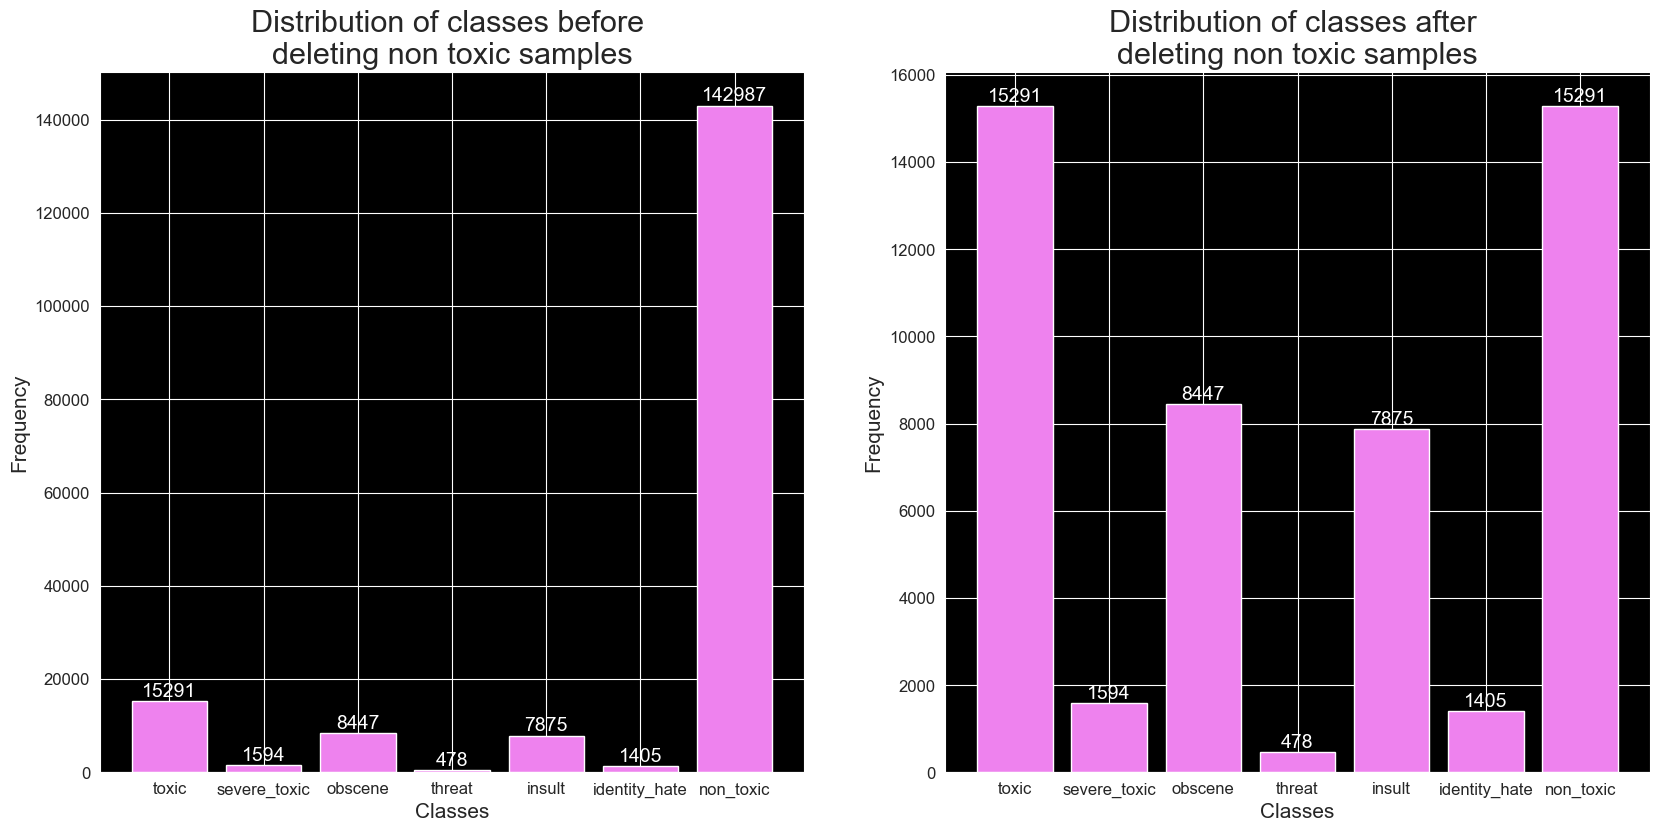

In [32]:
def checkDist(B_data, A_data):
    
    Total_of_Class = {}                   # Total labeled comments from each class
    for col in B_data.iloc[:,2:9].columns:
        Total_of_Class[col] = B_data[col].value_counts()[1] # number of comments labelled as 1 in each category
   
    Total_of_Class_A = {}                   # Total labeled comments from each class
    for col in A_data.iloc[:,2:9].columns:
        Total_of_Class_A[col] = A_data[col].value_counts()[1] # #comments labelled 1 in each category
        
    multi_label_total_B = {}
    for value in B_data["total_classes"].unique():
        multi_label_total_B[value] = B_data["total_classes"].value_counts()[value] # counts of multilabelled comments for each category based on number of classes messages belong to
    klstB= [key for key in multi_label_total_B.keys()]      # messages belong to [0,1,3,4,5] classes at the same time, so how many belong to each of these
    vlstB = [key for key in multi_label_total_B.values()]
    
    multi_label_total_A = {}
    for value in A_data["total_classes"].unique():
        multi_label_total_A[value] = A_data["total_classes"].value_counts()[value]
    klstA = [key for key in multi_label_total_A.keys()]
    vlstA = [key for key in multi_label_total_A.values()]
        
    # plotting distribution of classes 

    font1 = {"size":12}
    all_tox = list(Total_of_Class.values())
    plt.figure(figsize=(20,20))
    #plt.rcParams.update({'font.size': 12})
    plt.rc("font",**font1)

    left = plt.subplot(2,2,1)
    plt.bar(x = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic'], height = Total_of_Class.values(), color="violet")
    left.set_facecolor("black")
    left.set_title("Distribution of classes before \ndeleting non toxic samples", fontsize=22)
    left.set_xlabel("Classes", fontsize=15)
    left.set_ylabel("Frequency", fontsize=15)
    for key in ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic']:
        left.annotate(text=Total_of_Class[key], xy=(key,Total_of_Class[key]+1000), xycoords="data", color="white", size=14, ha="center")

    right = plt.subplot(2,2,2)
    plt.bar(x = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic'], height = Total_of_Class_A.values(), color="violet")
    right.set_facecolor("black")
    right.set_title("Distribution of classes after \ndeleting non toxic samples",fontsize=22)
    right.set_xlabel("Classes", fontsize=15)
    right.set_ylabel("Frequency", fontsize=15)
    for key in ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','non_toxic']:
        right.annotate(text=Total_of_Class_A[key], xy=(key,Total_of_Class_A[key]+100), xycoords="data", color="white", size=14, ha="center")
    
#     bleft = plt.subplot(2,2,3)
#     plt.bar(x = klstB, height = vlstB, color="Yellow")
#     bleft.set_facecolor("black")
#     bleft.set_title("Distribution of total labeled comments \nbefore deleting non toxic samples",fontsize=22)
#     bleft.set_xlabel("Total no. of classes comments belong", fontsize=15)
#     bleft.set_ylabel("Frequency", fontsize=15)
#     for key in klstB:
#         bleft.annotate(text=multi_label_total_B[key], xy=(key,multi_label_total_B[key]+100), xycoords="data", color="white", size=14, ha="center")

#     bright = plt.subplot(2,2,4)
#     plt.bar(x = klstA, height = vlstA, color="Yellow")
#     bright.set_facecolor("black")
#     bright.set_title("Distribution of total labeled comments \nafter deleting non toxic samples",fontsize=22)
#     bright.set_xlabel("Total no. of classes comments belong", fontsize=15)
#     bright.set_ylabel("Frequency", fontsize=15)
#     for key in klstA:
#         bright.annotate(text=multi_label_total_A[key], xy=(key,multi_label_total_A[key]+100), xycoords="data", color="white", size=14, ha="center")

checkDist(cleaned_data, Final_data)

In [33]:
#!pip install scikit-learn

In [34]:
# Separating data into training , validation and testing sets
from sklearn.model_selection import train_test_split


# we will pass "total_classes" column of the dataset to "stratify" parameter for the even distribution of data
X_rest, X_test, Y_rest, Y_test = train_test_split(Final_data.iloc[:,1],Final_data.iloc[:,2:], test_size=0.1, stratify=Final_data.iloc[:,9])
X_train, X_val, Y_train, Y_val = train_test_split(X_rest,Y_rest, test_size=0.1, stratify=Y_rest.iloc[:,-1])

Y_test.drop(columns=["total_classes"], inplace=True)
Y_train.drop(columns=["total_classes"], inplace=True)
Y_val.drop(columns=["total_classes"], inplace=True)

X_train = X_train.reset_index()
X_train.drop(columns=["index"], inplace=True)
Y_train = Y_train.reset_index()
Y_train.drop(columns=["index"], inplace=True)
X_test = X_test.reset_index()
X_test.drop(columns=["index"], inplace=True)
Y_test = Y_test.reset_index()
Y_test.drop(columns=["index"], inplace=True)
X_val = X_val.reset_index()
X_val.drop(columns=["index"], inplace=True)
Y_val = Y_val.reset_index()
Y_val.drop(columns=["index"], inplace=True)

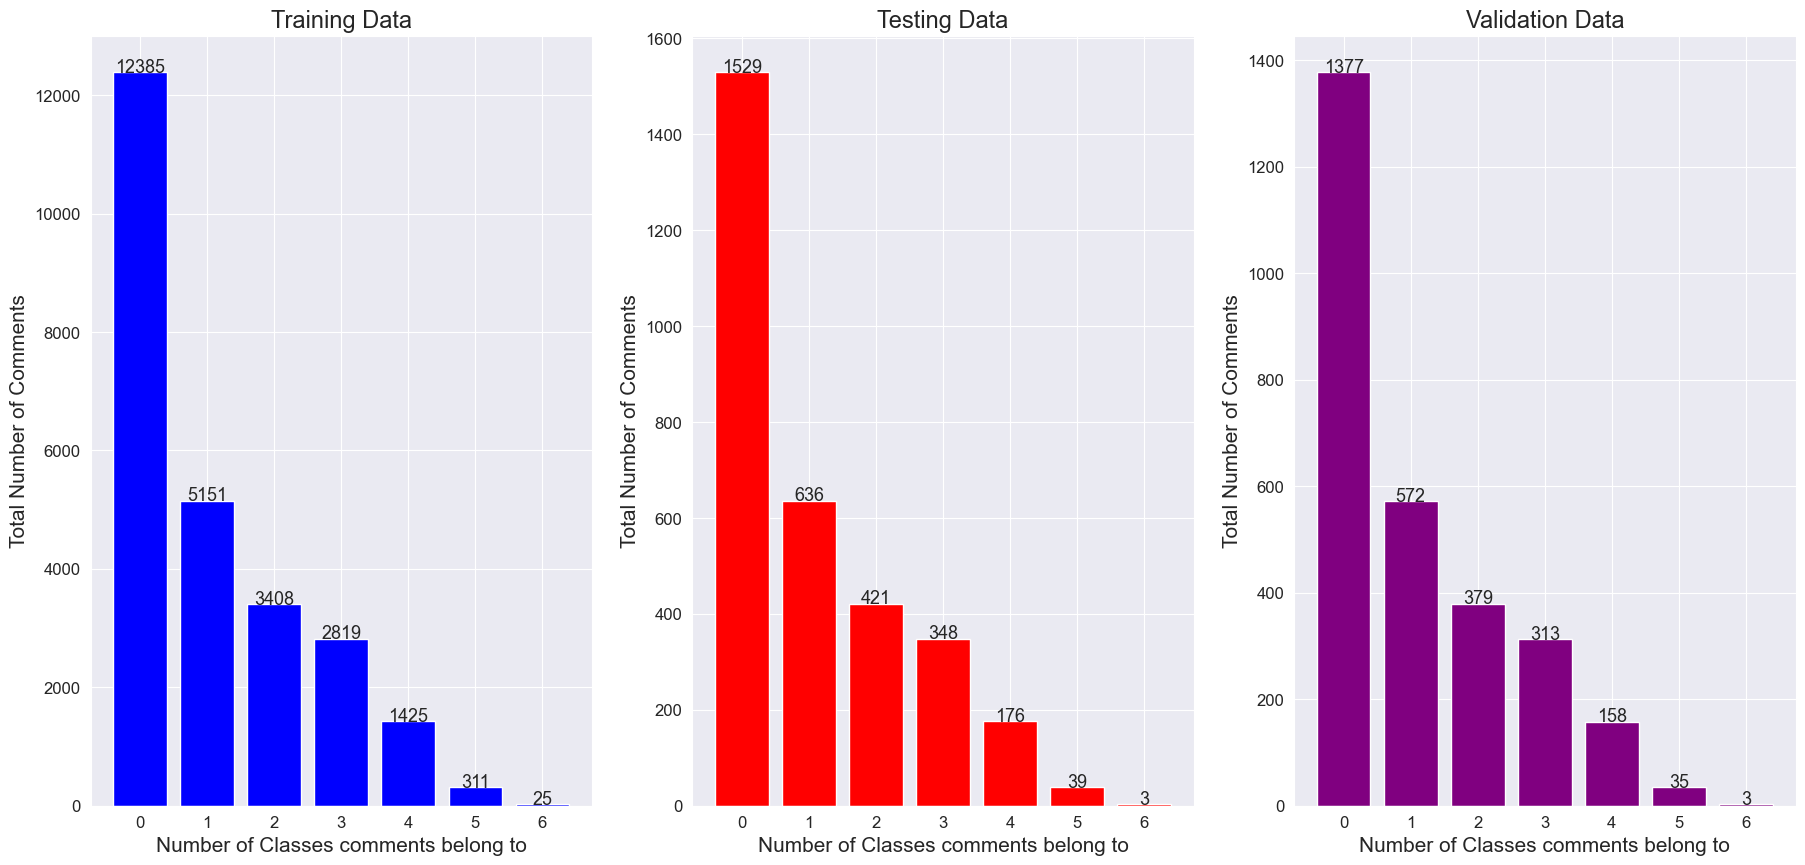

In [35]:
def check_distribution_V(ytrain, yval, ytest):
    # creating new column named "sum" to show total num of classes comment belongs to
    y_train = ytrain.copy()
    y_val = yval.copy()
    y_test = ytest.copy()
    y_train["sum"] = y_train.iloc[:, :6].apply(lambda x: sum(x), axis=1) # here axis=1 means apply function is applied to each row
    y_val["sum"] = y_val.iloc[:, :6].apply(lambda x: sum(x), axis=1)
    y_test["sum"] = y_test.iloc[:, :6].apply(lambda x: sum(x), axis=1)
    
    # creating dict of ytrain and ytest to get total no of values in sum column
    dtrain = {}
    dval = {}
    dtest = {}
    for i,value in enumerate(y_train["sum"].value_counts()):
        dtrain[i] = value
    for i,value in enumerate(y_val["sum"].value_counts()):
        dval[i] = value
    for i,value in enumerate(y_test["sum"].value_counts()):
        dtest[i] = value
    
    # creating lists of keys and values for plotting distribution
    kTrlst= [key for key in dtrain.keys()]
    vTrlst = [key for key in dtrain.values()]
    kValst= [key for key in dval.keys()]
    vValst = [key for key in dval.values()]
    kTelst= [key for key in dtest.keys()]
    vTelst = [key for key in dtest.values()]
    
    # plotting distribution of dataset 
    plt.figure(figsize=(22,10))
    
    # Traning
    fr = plt.subplot(1,3,1)
    plt.bar(height=vTrlst,x=kTrlst, color="blue")
    fr.set_xlabel("Number of Classes comments belong to", fontsize=15)
    fr.set_ylabel("Total Number of Comments", fontsize=15)
    fr.set_title("Training Data", fontsize=17)
    for key in kTrlst:
        fr.annotate(text=dtrain[key], xy=(key,dtrain[key]), xycoords="data",size=13, ha="center")
    
    # Testing
    se = plt.subplot(1,3,2)
    plt.bar(height=vTelst,x=kTelst, color="red")
    se.set_xlabel("Number of Classes comments belong to", fontsize=15)
    se.set_ylabel("Total Number of Comments", fontsize=15)
    se.set_title("Testing Data", fontsize=17)
    for key in kTelst:
        se.annotate(text=dtest[key], xy=(key,dtest[key]), xycoords="data",size=13, ha="center")
     
    # Validation
    th = plt.subplot(1,3,3)
    plt.bar(height=vValst,x=kValst,  color="purple")
    th.set_xlabel("Number of Classes comments belong to", fontsize=15)
    th.set_ylabel("Total Number of Comments", fontsize=15)
    th.set_title("Validation Data", fontsize=17)
    for key in kValst:
        th.annotate(text=dval[key], xy=(key,dval[key]), xycoords="data",size=13, ha="center")

check_distribution_V(Y_train, Y_val, Y_test)

In [36]:
#!pip install transformers


In [37]:
#!pip install torch


In [38]:
from transformers import DistilBertTokenizer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# Using Pretrained DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Creating Dataset class for Toxic comments and Labels 
class Toxic_Dataset(Dataset):
    def __init__(self, Comments_, Labels_):
        self.comments = Comments_.copy()
        self.labels = Labels_.copy()
        
        self.comments["comment_text"] = self.comments["comment_text"].map(lambda x: tokenizer(x, padding="max_length", truncation=True, return_tensors="pt"))
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        comment = self.comments.loc[idx,"comment_text"]
        label = np.array(self.labels.loc[idx,:])
        
        return comment, label

C:\Users\grish\anaconda3\envs\3proj\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\grish\anaconda3\envs\3proj\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
# Making Training, Testing and Validation of data using Dataset class
Train_data = Toxic_Dataset(X_train, Y_train)
Test_data = Toxic_Dataset(X_test, Y_test)
Val_data = Toxic_Dataset(X_val, Y_val)

# Making datasets into batches 
Train_Loader = DataLoader(Train_data, batch_size=32, shuffle=True)
Test_Loader = DataLoader(Test_data, shuffle=True)        #batch_size=16, 
Val_Loader = DataLoader(Val_data, shuffle=True)          #batch_size=16,

In [40]:
#import tensorflow as tf
#print(tf.__version__)

In [41]:
# DistilBERT
from transformers import DistilBertForSequenceClassification

Distil_bert = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Distil_bert.classifier = nn.Sequential(
                    nn.Linear(768,7),
                    nn.Sigmoid()
                  )
print(Distil_bert)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [42]:
from torch.optim import Adam
from tqdm import tqdm
from torch.nn import BCELoss
from torch.optim.lr_scheduler import StepLR

def train_Model(model,Train_DL, Val_DL, learning_rate, epochs):
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    Loss = BCELoss()
    Optimizer = Adam(params=model.parameters(), lr=learning_rate)
    scheduler = StepLR(Optimizer, step_size=212, gamma=0.1)
    
    model.to(device)
    model.train()
    
    train_acc_epochs = []
    train_loss_epochs = []
    val_acc_epochs = []
    val_loss_epochs = []
    
    for epoch in range(epochs):
        training_loss = {}
        training_accuracy = {}
        validation_loss = {}
        validation_accuracy = {}
        batch = 0
        
        for comments, labels in tqdm(Train_DL):
            
            labels = labels.to(device)
            labels = labels.float()
            masks = comments["attention_mask"].squeeze(1).to(device) # the model used these masks to attend only to the non-padded tokens in the sequence
            input_ids = comments["input_ids"].squeeze(1).to(device) # contains the tokenized and indexed representation for a batch of comments
            # squeeze is used to remove the second dimension which has size 1.
            output = model(input_ids, masks) # vector of logits for each class
            loss = Loss(output.logits, labels) # compute the loss
            
            Optimizer.zero_grad()
            loss.backward()
            Optimizer.step()
            scheduler.step()

            
            batch += 1 
            if batch%53 == 0:
                with torch.no_grad():
                    acc = []
                    op = output.logits
                    for lb in range(len(labels)): # note: labels is of shape (batch_size, num_classes(=7))
                        correct = 0
                        for i in range(len(labels[lb])):  # therefore len(labels[lb]) is 7
                            res = 1 if op[lb,i]>0.5 else 0
                            if res == labels[lb,i]:
                                correct += 1
                        acc.append(correct/len(labels[lb]))

                    training_loss[batch] = loss.item()
                    training_accuracy[batch] = sum(acc)/len(acc)
                    print(f"Epoch:{epoch+1} | batch no:{batch}/{len(Train_DL)} | Loss:{loss.item():.4f} | Accuracy:{sum(acc)/len(acc):.4f}")
        
                    # Testing model on validation Data
                    accVal = []
                    val_loss = 0
                    for comments, labels in Val_DL:
                        labels = labels.to(device)
                        labels = labels.float()
                        masks = comments["attention_mask"].squeeze(1).to(device)
                        input_ids = comments["input_ids"].squeeze(1).to(device)
    
                        output = model(input_ids, masks)
                        loss = Loss(output.logits, labels)
                        val_loss += loss.item()
            
                        op = output.logits
                        correct_val = 0
                        for i in range(7):
                            res = 1 if op[0,i]>0.5 else 0
                            if res == labels[0,i]:
                                correct_val += 1
                        accVal.append(correct_val/7)
                    
                    validation_loss[batch] = val_loss/len(Val_DL)
                    validation_accuracy[batch] = sum(accVal)/len(accVal)
                    print(f" Validation Loss:{val_loss/len(Val_DL):.4f} | Validation Accuracy:{sum(accVal)/len(accVal):.4f}")
            
        train_acc_epochs.append(training_accuracy)
        train_loss_epochs.append(training_loss)
        val_acc_epochs.append(validation_accuracy)
        val_loss_epochs.append(validation_loss)
    
    return train_acc_epochs, train_loss_epochs, val_acc_epochs, val_loss_epochs

In [43]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print("Found GPUs:", gpus)


Found GPUs: []


In [44]:
# Cell 1: Проверка и настройка GPU/памяти
import tensorflow as tf

# 1.1. Посмотреть список доступных GPU
gpus = tf.config.list_physical_devices('GPU')
print("Found GPUs:", gpus)




Found GPUs: []


In [45]:
# 1.2. Если GPU есть — включить динамический рост памяти
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)



In [46]:
# 1.3. Включить XLA-компиляцию (JIT)
tf.config.optimizer.set_jit(True)

# 1.4. Включить смешанную точность (если у вас GPU с поддержкой FP16)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
print("Mixed precision policy:", mixed_precision.global_policy())


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
Mixed precision policy: <Policy "mixed_float16">


In [ ]:
# Training Model
TA, TL, VA, VL = train_Model(Distil_bert, Train_Loader, Val_Loader, learning_rate=0.0003, epochs=2)

  1%|          | 4/798 [00:42<2:26:40, 11.08s/it]

In [ ]:
# Evaluating model on Test data

def Evaluate_Model(model,Test_DL):
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    Loss = BCELoss()
    model.to(device)
    model.eval()
    
    accTest = []
    Test_loss = 0
    for comments, labels in Test_DL:
        labels = labels.to(device)
        labels = labels.float()
        masks = comments["attention_mask"].squeeze(1).to(device)
        input_ids = comments["input_ids"].squeeze(1).to(device)
    
        output = model(input_ids, masks)
        loss = Loss(output.logits, labels)
        Test_loss += loss.item()
            
        op = output.logits
        correct_val = 0
        for i in range(7):
            res = 1 if op[0,i]>0.5 else 0
            if res == labels[0,i]:
                correct_val += 1
        accTest.append(correct_val/7)
    
    print("Testing Dataset:\n")
    print(f" Test Loss:{Test_loss/len(Test_DL):.4f} | Test Accuracy:{sum(accTest)/len(accTest):.4f}")

Evaluate_Model(Distil_bert, Test_Loader)

In [ ]:
def Acc_Loss_Plot(TA1, TA2, TL1, TL2, VA1, VA2, VL1, VL2):
    plt.figure(figsize=(20,14))
    Ac = plt.subplot(2,2,1)
    plt.plot(TA1.keys(), TA1.values())
    plt.plot(TA2.keys(), TA2.values())
    Ac.set_xlabel("Step Number", fontsize=15)
    Ac.set_ylabel("Accuracy", fontsize=15)
    Ac.set_title("Training Accuracy", fontsize=20)
    Ac.legend(["Epoch 1","Epoch 2"])

    Ls = plt.subplot(2,2,2)
    plt.plot(TL1.keys(), TL1.values())
    plt.plot(TL2.keys(), TL2.values())
    Ls.set_xlabel("Step Number", fontsize=15)
    Ls.set_ylabel("Loss", fontsize=15)
    Ls.set_title("Training Loss", fontsize=20)
    Ls.legend(["Epoch 1","Epoch 2"])
    
    VAc = plt.subplot(2,2,3)
    plt.plot(VA1.keys(), VA1.values())
    plt.plot(VA2.keys(), VA2.values())
    VAc.set_xlabel("Step Number", fontsize=15)
    VAc.set_ylabel("Accuracy", fontsize=15)
    VAc.set_title("Validation Accuracy", fontsize=20)
    VAc.legend(["Epoch 1","Epoch 2"])

    VLs = plt.subplot(2,2,4)
    plt.plot(VL1.keys(), VL1.values())
    plt.plot(VL2.keys(), VL2.values())
    VLs.set_xlabel("Step Number", fontsize=15)
    VLs.set_ylabel("Loss", fontsize=15)
    VLs.set_title("Validation Loss", fontsize=20)
    VLs.legend(["Epoch 1","Epoch 2"])

Acc_Loss_Plot(TA[0], TA[1], TL[0], TL[1], VA[0], VA[1], VL[0], VL[1])

In [ ]:
# Saving model
#torch.save(Distil_bert,"dsbert_toxic_balanced.pt")